# Waldbranderkennung

In diesem Deep-Learning-Projekt wurde eine Bildklassifikation mit der Keras-Bibliothek durchgeführt.
Die verwendeten Bilder stammen aus dem folgenden Kaggle-Dataset:

https://www.kaggle.com/datasets/elmadafri/the-wildfire-dataset/data

Aus diesem Dataset wurden ein Trainingsordner und ein Testordner verwendet, die jeweils zwei Unterordner enthalten: ‚Feuer‘ und ‚Kein Feuer‘.

## Import der Module

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt

## Bilder Laden

Aus den Ordnernamen wird die Zielklasse für das Modell abgeleitet,  u.z. mit dem Üarameter *labels='inferred'*:

In [2]:
train_data = keras.utils.image_dataset_from_directory(
    r'C:\Users\mesgh\OneDrive\Deep Learning\Projektarbeit\train',  # Pfad zu den Bildern
    labels='inferred',            # Labels aus den Dateiname ableiten
    
    label_mode='int',             # 'int' in Ordnung, weil nur zwei Klassen vorhanden (sonst categorical)  
    class_names=None,             # Man kann optional eine Liste der Klassennamen übergeben
    color_mode='rgb',             # Bilder farbig ausgeben. Alternativ: 'grayscale', 'rgba'
    
    batch_size=50,                # Wie viele Bilder auf einmal von der Festplatte geladen werden 
    image_size=(128, 128),        # Biler auf die angegebene Größe skalieren
    shuffle=True,                 # Vor jeder Epoche die Bilder durchmischen
    seed=None,                    # if not None Durchmischen in bestimmter Reihenfolge durchführen
    validation_split=None,        # Gibt den Anteil der Validationdaten an
    subset=None,                  # Gibt an, ob man die Trainigs- oder Validationdaten bekommen möchte
    interpolation='bilinear',     # Wie die Skalierung durchfgeführt wird
    follow_links=False,           # Ordnerstruktur nachverfolgen
    # Auf die Bildmitte zuschneiden um das Seitenverhältnis nicht zu verändern
    crop_to_aspect_ratio=False)

Found 1887 files belonging to 2 classes.


C:\Users\mesgh\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [3]:
validation_data = keras.utils.image_dataset_from_directory(
    r'C:\Users\mesgh\OneDrive\Deep Learning\Projektarbeit\test',  # Pfad zu den Bildern
    labels='inferred',            # Labels aus den Dateiname ableiten
    # 'int' oder 'categorical' je nach Aufgabe Regression oder Klassifikation
    label_mode='int',
    class_names=None,             # Man kann optional eine Liste der Klassennamen übergeben
    color_mode='rgb',             # Bilder farbig ausgeben. Alternativ: 'grayscale', 'rgba'
    # Wie viele Bilder auf einmal von der Festplatte geladen werden
    batch_size=50,
    image_size=(128, 128),        # Biler auf die angegebene Größe sklaieren
    shuffle=True,                 # Vor jeder Epoche die Bilder durchmischen
    # if not None Durchmischen in bestimmter Reihenfolge durchführen
    seed=None,
    validation_split=None,        # Gibt den Anteil der Validationdaten an
    # Gibt an, ob man die Trainigs- oder Validationdaten bekommen möchte
    subset=None,
    interpolation='bilinear',     # Wie die Skalierung durchfgeführt wird
    follow_links=False,           # Ordnerstruktur nachverfolgen
    # Auf die Bildmitte zuschneiden um das Seitenverhältnis nicht zu verändern
    crop_to_aspect_ratio=False)

Found 410 files belonging to 2 classes.


## Einige Bilder der Trainingsdaten abrufen und anzeigen

In [4]:
# Mit dem take Befehl können wir aus den Trainigsdaten einen nächsten Batch abrufen
batch = train_data.take(1)

# Die Dimensionen der Bilder ausgeben, dazu den Batch in eine Liste umwandeln
# Wir geben für den ersten Batch (erste [0]), und die Bilder [zweite [0]] den shape aus
print(list(batch)[0][0].shape)

(50, 128, 128, 3)


In [5]:
# Dimensionen der Labels des Batches
print(list(batch)[0][1].shape)

(50,)


(50, 128, 128, 3)
(50,)


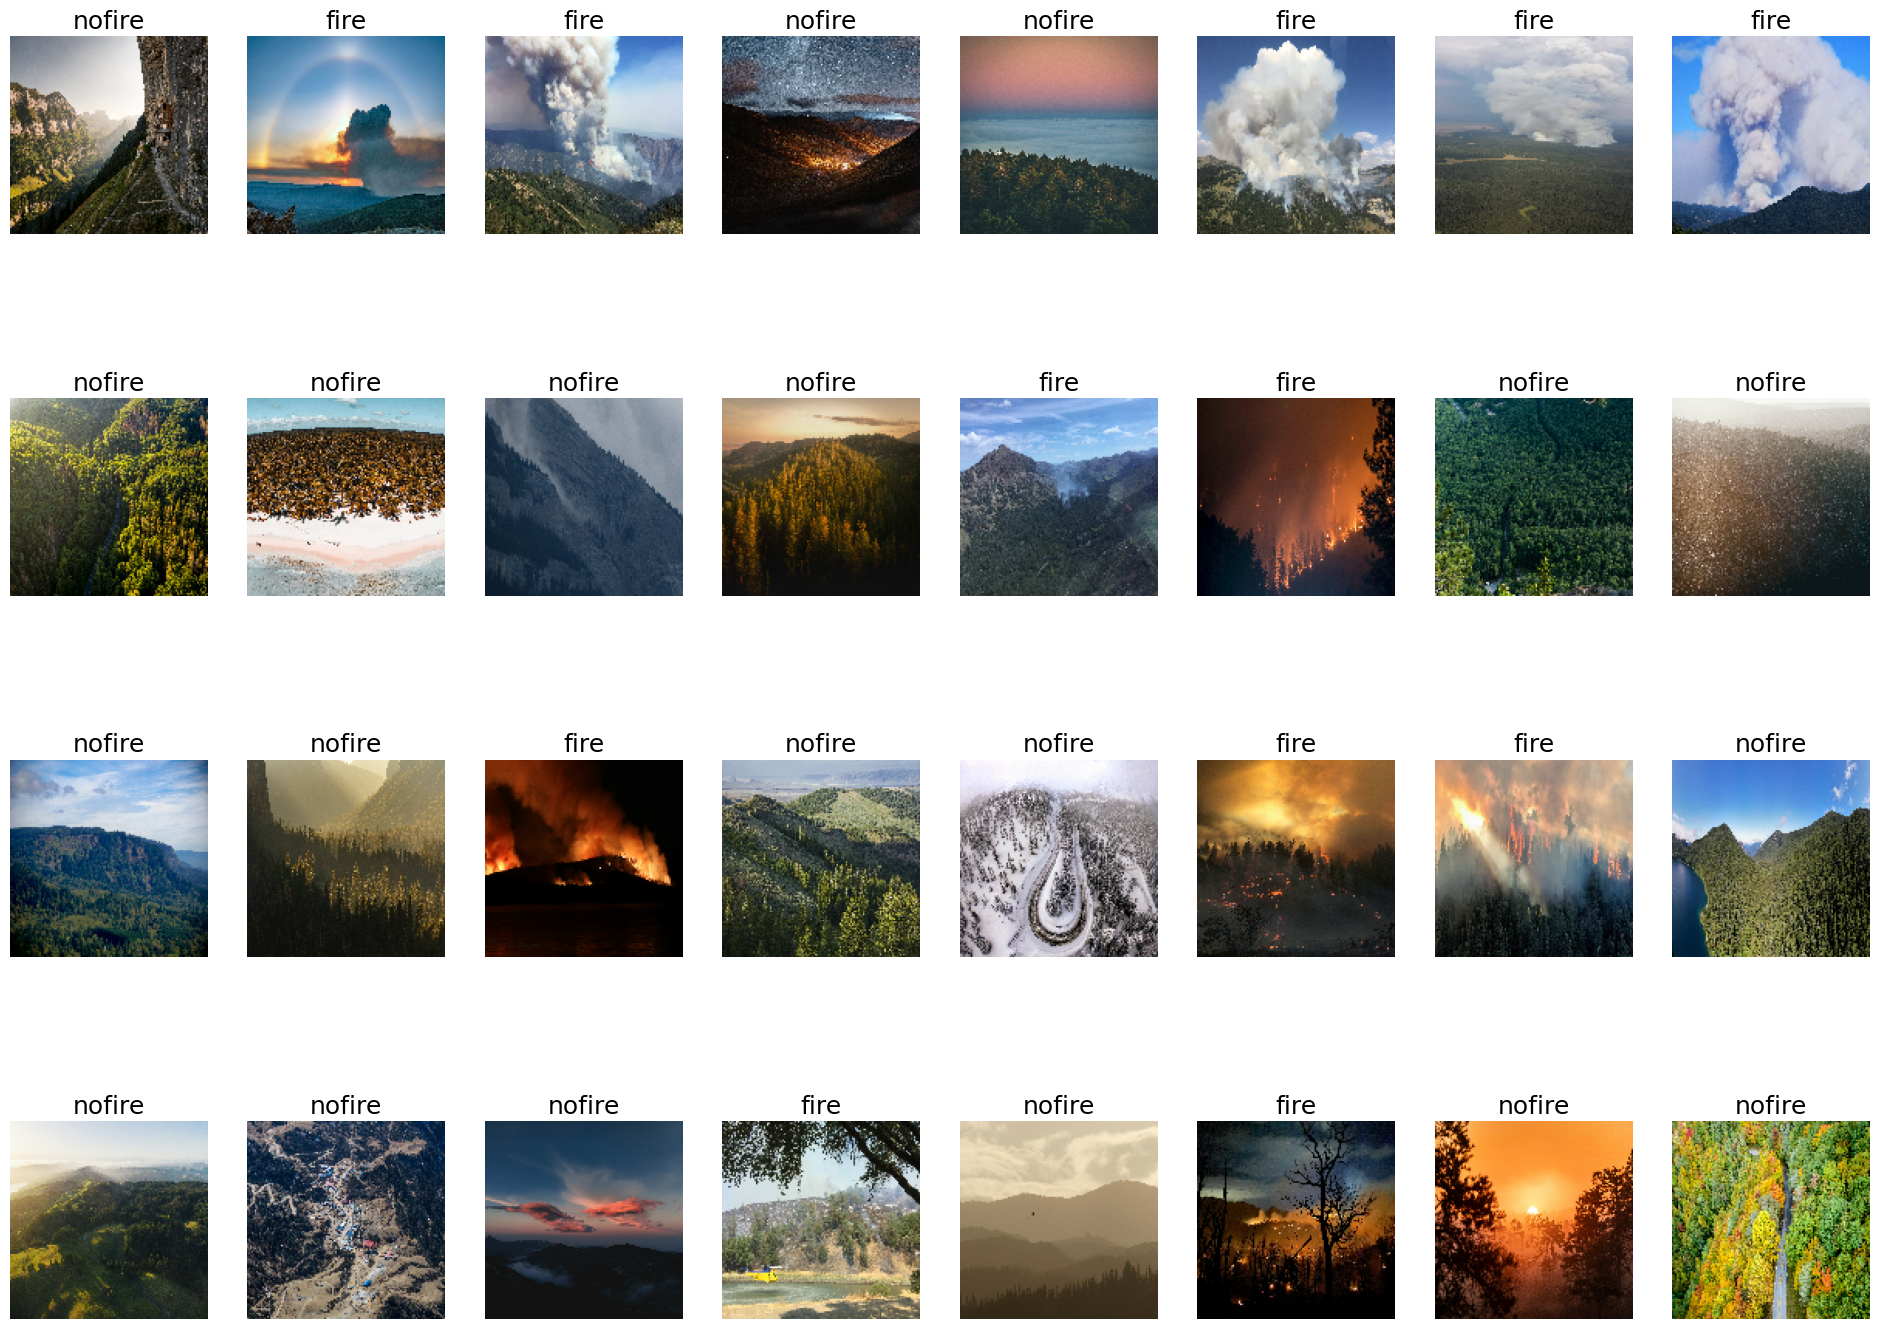

In [6]:
# Um an die Daten ranzukommen kann auch über den gesamten Datensatz iteriert werden
plt.figure(figsize=(24, 18))
for images, labels in train_data:
    print(images.shape)
    print(labels.shape)
    for i in range(32):
        plt.subplot(4, 8, i+1)
        plt.imshow(images[i].numpy().astype('int'))
        plt.title(train_data.class_names[labels[i]], fontsize=18)
        plt.axis('off')
    plt.show()
    break

## Die Modelle erzeugen

### Erstes Modell: das "Data Augmentation" Modell

Data Augmentation ist eine Technik im Deep Learning, mit der die Größe und Vielfalt des Trainingsdatensatzes künstlich erhöht wird. Dazu werden realistische Veränderungen an bestehenden Bildern vorgenommen, um Overfitting entgegenzuwirken.
Durch die Anwendung zufälliger Transformationen entstehen neue Versionen der Trainingsbilder. Typische Transformationen sind:

Rotation (Drehung);

Verschiebung (Translation);

Spiegelung (Flip);

Skalierung;

Helligkeitsänderung;

Zoom

In [7]:
# Image Data Augmentation im neuronalen Netz
model_aug = keras.models.Sequential()
model_aug.add(keras.layers.RandomRotation(
    0.05,  # 0.05 * 2*pi = 18°
    fill_mode="nearest",
    interpolation="bilinear",
    seed=None,
    fill_value=128,
    input_shape=(128, 128, 3)))
model_aug.add(keras.layers.RandomTranslation(
    0.1,
    0.1,
    fill_mode="nearest",
    interpolation="bilinear",
    seed=None,
    fill_value=128))
model_aug.add(keras.layers.RandomFlip(
    mode="horizontal_and_vertical", seed=None))

model_aug.summary()

C:\Users\mesgh\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation (RandomRotation)     │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation                   │ (None, 128, 128, 3)         │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 128, 128, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Aus dem Datensatz ein Beispielbild auswählen und durch das Data-Augmentation-Modell vervielfältigen

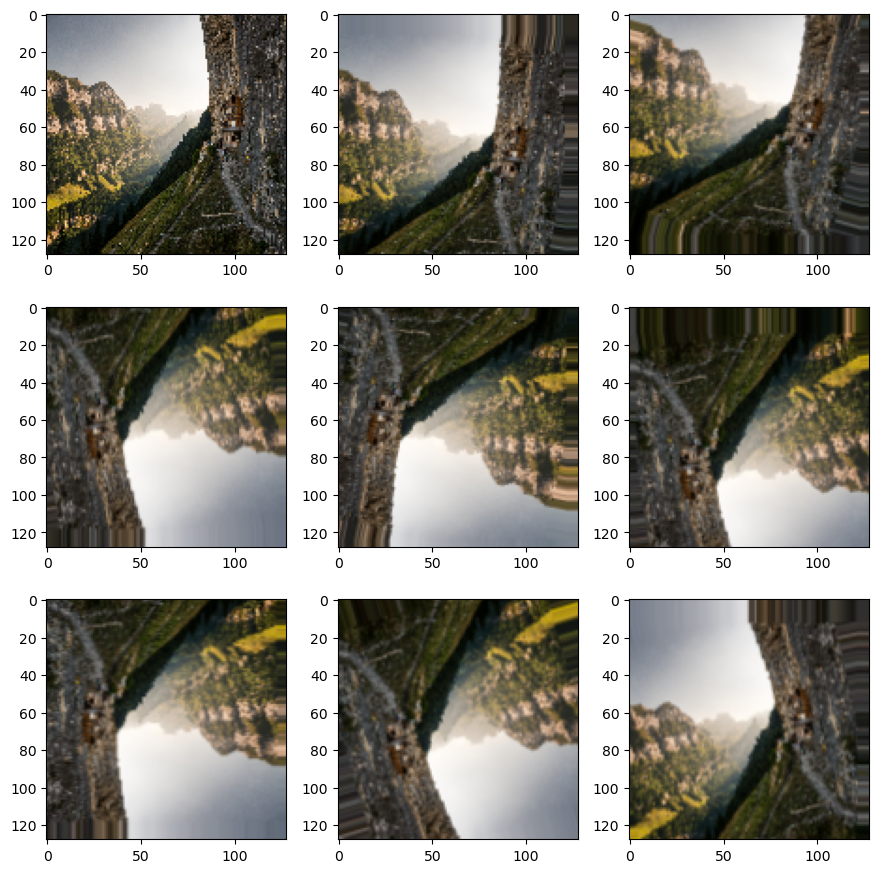

In [8]:
# example_image mit der Dimension (1, 256, 256, 3)
example_image = images[0:1].numpy()

plt.subplots(3, 3, figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, 1 + i)
    # Erstes Bild in oberer linken Ecke soll das Original sein
    if i == 0:
        image = example_image[0].astype('uint8')
    else:
        image = model_aug(
            example_image, training=True).numpy().astype('uint8')[0]
    plt.tight_layout()
    plt.imshow(image)
plt.show()

### Ein zweites Modell als Basis-Modell konfigurieren: das MobileNet-Modell

In [9]:
base_model = keras.applications.MobileNet(
    input_shape=(128, 128, 3),  # größe der Bilder am Eingang
    # bestimmt die Breite (Anzahl der Kanäle) in einzelnen Schichten
    alpha=1.0,
    # bestimmt die Tiefe (Anzahl der Schichten) des Modells
    depth_multiplier=1,
    dropout=0.001,  # Wird ignoriert bei include_top=False
    # Entfernt die Ausgabeschichten um Gewichtungen von imagenet verwenden zu können
    include_top=False,
    weights='imagenet',  # Gewichtungen von imagenet bzw. None=zufäälig initialisiert
    input_tensor=None,
    pooling='avg',    # Am Ende noch eine GlobalAveragePooling-Schicht hinzufügen
    classes=1000,    # Wird ignoriert bei include_top=False
    classifier_activation="sigmoid")  # Wird ignoriert bei include_top=False
base_model.summary()

Model: "mobilenet_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 64, 64, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 64, 64, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 64, 64, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 64, 64, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 32, 32, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 32, 32, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 32, 32, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 32, 32, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

### Die zwei Modelle zusammenfügen und mit einer neuen Ausgabeschicht versehen

In [10]:
# Mit Hilfe einer Lambda-schicht können wir auch normale TensorFlow-Funktionen
# wie die preprocess_input-Funktion in ein neuronales Netz integrieren

model = keras.models.Sequential()
model.add(keras.layers.Input((128, 128, 3)))
model.add(model_aug)
model.add(keras.layers.Lambda(keras.applications.mobilenet.preprocess_input))
model.add(base_model)
model.add(keras.layers.Dense(1, activation='sigmoid'))
#model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_128 (Functional)      │ (None, 1024)                │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

## Base-Model einfrieren & Modell kompilieren

In [11]:
base_model.trainable = False
optimizer = keras.optimizers.Adam(learning_rate=0.0001)


model.compile(optimizer=optimizer, loss='binary_crossentropy', 
              metrics=["accuracy"])  # Calculates how often predictions equal labels

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_128 (Functional)      │ (None, 1024)                │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

## Wir fitten das Modell auf die Trainingsdaten die jeweils als Batch 50 Bilder gleichzeitig von der Festplatte laden

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                 patience=50, #Reduces the learning rate if the monitored metric (loss) doesn't improve for 
                                                              # 50 consecutive epochs
                                                 cooldown=50)

early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10,                 # Stops training if the validation loss doesn't improve for 10 consecutive epochs
                           restore_best_weights=True)

model.fit(train_data, epochs=50,         # batch_size hier nicht nötig, weil schon am Anfang festgelegt, u.z. 200
          validation_data=validation_data,
          callbacks=[lr_reduction, early_stop])

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 176s 5s/step - accuracy: 0.5258 - loss: 0.7842 - val_accuracy: 0.5512 - val_loss: 0.7181 - learning_rate: 1.0000e-04
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.5987 - loss: 0.7167 - val_accuracy: 0.5902 - val_loss: 0.6753 - learning_rate: 1.0000e-04
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.5892 - loss: 0.6795 - val_accuracy: 0.6244 - val_loss: 0.6374 - learning_rate: 1.0000e-04
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 174s 5s/step - accuracy: 0.6437 - loss: 0.6444 - val_accuracy: 0.6390 - val_loss: 0.6052 - learning_rate: 1.0000e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 179s 5s/step - accuracy: 0.6534 - loss: 0.6259 - val_accuracy: 0.6634 - val_loss: 0.5770 - learning_rate: 1.0000e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.6818 - loss: 0.5927 - val_accuracy: 0.6902 - val_loss: 0.5523 - learning_rate: 1.0000e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 177s 5s/step - accuracy: 0.6730 

### Lernkurven plotten

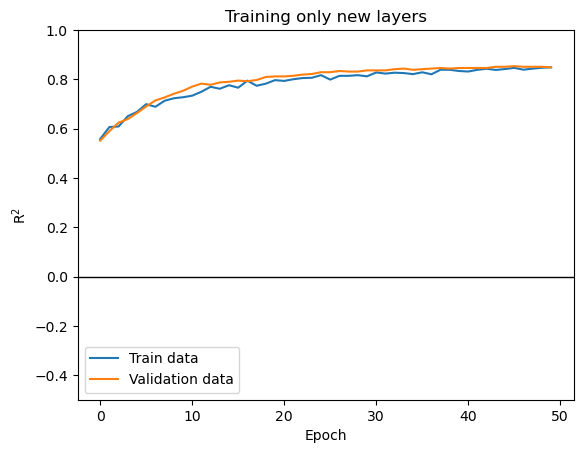

In [13]:
history = model.history.history

plt.plot(history['accuracy'], label='Train data')
plt.plot(history['val_accuracy'], label='Validation data')
plt.legend()
plt.title('Training only new layers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1])
plt.axhline(color='black', linewidth=1)
plt.show()

## Parameteroptimierung: Aktivierung des Trainings des Basismodelles

In [14]:
base_model.trainable = True
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', 
              metrics=["accuracy"])  # Calculates how often predictions equal labels

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_128 (Functional)      │ (None, 1024)                │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                 patience=30, #Reduces the learning rate if the monitored metric (loss) doesn't improve for 
                                                              # 50 consecutive epochs
                                                 cooldown=30)

early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10,                 # Stops training if the validation loss doesn't improve for 10 consecutive epochs
                           restore_best_weights=True)

model.fit(train_data, epochs=50,         # batch_size hier nicht nötig, weil schon am Anfang festgelegt, u.z. 200
          validation_data=validation_data,
          callbacks=[lr_reduction, early_stop])

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.8133 - loss: 0.3901 - val_accuracy: 0.8610 - val_loss: 0.3233 - learning_rate: 1.0000e-04
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.8975 - loss: 0.2540 - val_accuracy: 0.8171 - val_loss: 0.4941 - learning_rate: 1.0000e-04
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.9258 - loss: 0.1829 - val_accuracy: 0.8390 - val_loss: 0.4738 - learning_rate: 1.0000e-04
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.9344 - loss: 0.1609 - val_accuracy: 0.8951 - val_loss: 0.2832 - learning_rate: 1.0000e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.9396 - loss: 0.1468 - val_accuracy: 0.8780 - val_loss: 0.3483 - learning_rate: 1.0000e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.9743 - loss: 0.0877 - val_accuracy: 0.9195 - val_loss: 0.2554 - learning_rate: 1.0000e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.9703 

Hier liegt ein Fall von Early Stopping vor: Das Modell hat das Training bei Epoche Nr. 27 beendet. Sowohl die Metriken Accuracy als auch Loss zeigen sehr gute Werte.

### Lernkurven plotten

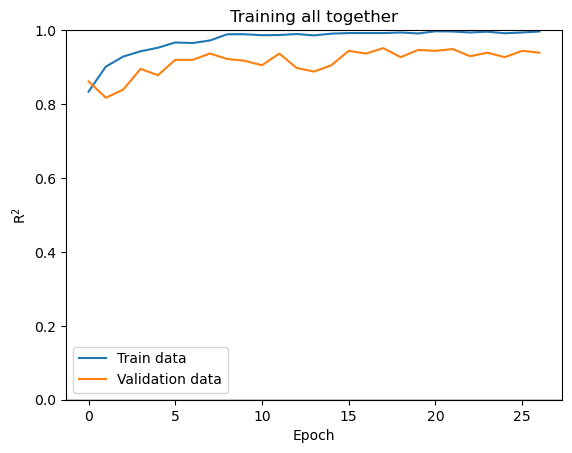

In [16]:
history = model.history.history

plt.plot(history['accuracy'], label='Train data')
plt.plot(history['val_accuracy'], label='Validation data')
plt.legend()
plt.title('Training all together')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.axhline(color='black', linewidth=1)
plt.show()

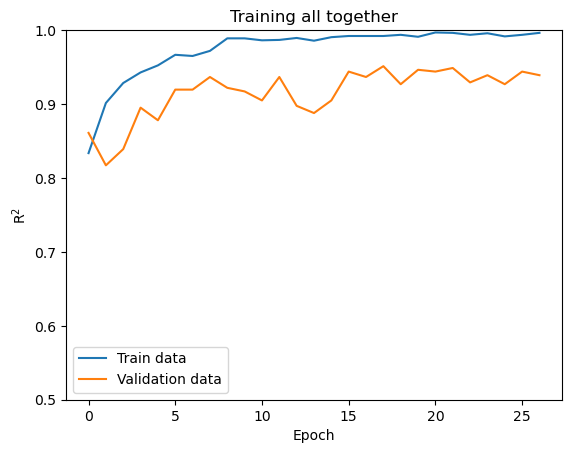

In [17]:
history = model.history.history

plt.plot(history['accuracy'], label='Train data')
plt.plot(history['val_accuracy'], label='Validation data')
plt.legend()
plt.title('Training all together')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.axhline(color='black', linewidth=1)
plt.show()

## Eine Prognose durchführen und darstellen

(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 704ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 465ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 448ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 490ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 483ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 475ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 499ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 480ms/step
(50,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 474ms/step
(50,)
2/2 

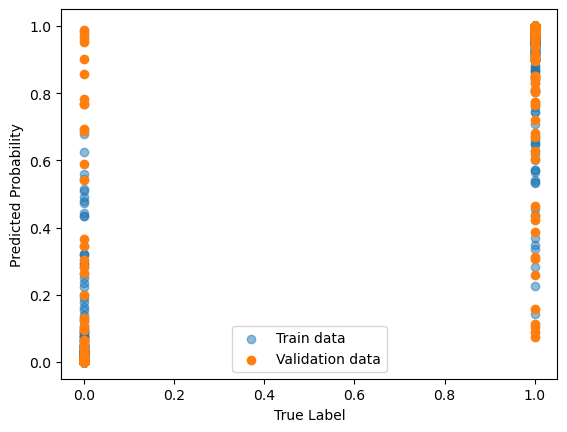

In [29]:
import numpy as np
import matplotlib.pyplot as plt

y_train = []
y_train_pred = []

# TRAIN DATA
for images, labels in train_data:
    print(labels.shape)
    y_train.extend(labels)
    preds = model.predict(images, verbose=True, batch_size=32)
    y_train_pred.extend(preds)

y_val = []
y_val_pred = []

# VALIDATION DATA
for images, labels in validation_data:
    print(labels.shape)
    y_val.extend(labels)
    preds = model.predict(images, verbose=True, batch_size=16)
    y_val_pred.extend(preds)

# In numpy-Arrays umwandeln
y_train = np.array(y_train)
y_train_pred = np.array(y_train_pred)

y_val = np.array(y_val)
y_val_pred = np.array(y_val_pred)

# Wende den Schwellenwert von 0.5 an – alles >= 0.5 wird Klasse 1, sonst Klasse 0
threshold = 0.5
y_train_pred_class = (y_train_pred >= threshold).astype(int)
y_val_pred_class = (y_val_pred >= threshold).astype(int)

# Beispielhafte Ausgabe zum Vergleich
for i in range(20):
    print('y_true:', y_val[i], 'y_pred (prob):', np.round(y_val_pred[i], 2), 'y_pred (class):', y_val_pred_class[i])

# Scatter-Plot der Wahrscheinlichkeiten (optional: nur wenn du echte Scores plotten willst)
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train data')
plt.scatter(y_val, y_val_pred, label='Validation data')
plt.xlabel('True Label')
plt.ylabel('Predicted Probability')
plt.legend()
plt.show()


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Vorhersagen in Klassen umwandeln
y_train_classes = (y_train_pred > 0.5).astype(int)
y_val_classes = (y_val_pred > 0.5).astype(int)

# Für Trainingsdaten
cm_train = confusion_matrix(y_train, y_train_classes)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_train.plot()
plt.title("Confusion Matrix – Train Data")
plt.show()

# Für Validierungsdaten
cm_val = confusion_matrix(y_val, y_val_classes)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1])
disp_val.plot()
plt.title("Confusion Matrix – Validation Data")
plt.show()


## Modelloptimierung: neue Klasse "Rauch" mit Ollama

Nun ist das Ziel, die Bilder aus dem Ordner „Feuer“ weiter zu unterteilen – in die Kategorien „Rauch“ und „Rauch und Feuer“ – und in entsprechenden Ordnern zu speichern. Da es sich um eine große Anzahl an Bildern handelt, wäre eine manuelle Sortierung zu zeitaufwändig. Zur automatisierten Unterstützung wurde das Ollama-Framework eingesetzt: Damit ließ sich das multimodale Modell LLaVA-LLaMA3 lokal auf dem Rechner ausführen und zur Klassifikation der Satellitenbilder verwenden – je nachdem, ob sie Rauch oder „Rauch und Feuer“ zeigten.

In [30]:
import requests
import base64
import json
import os
import csv
import shutil

def classify_image(image_path):
    with open(image_path, "rb") as f:
        image_data = f.read()
        image_base64 = base64.b64encode(image_data).decode("utf-8")

    prompt = ("""This is a satellite image. The image contains either smoke or fire (the images come from a folder 
                 that contains exclusively pictures of smoke and fire).
                 Please classify it using one word only:
                 - 'Smoke' if you see smoke,
                 - 'smoke_and_fire' if you see smoke as well as fire
              """
        
    )

    payload = {
        "model": "llava-llama3",
        "prompt": prompt,
        "images": [image_base64]
    }

    try:
        response = requests.post("http://localhost:11434/api/generate", json=payload, stream=True)
        if response.ok:
            result = ""
            for line in response.iter_lines():
                if line:
                    data = json.loads(line.decode("utf-8"))
                    result += data.get("response", "")
            response_text = result.strip().lower()

            if "smoke_and_fire" in response_text:
                return "smoke_and_fire"
            elif "smoke" in response_text:
                return "smoke"
            elif "none" in response_text:
                return "no_smoke"
            else:
                return "unclear"
        else:
            print(f"❌ Error on image {image_path}: {response.status_code}")
            return "error"
    except Exception as e:
        print(f"❌ Exception on image {image_path}: {e}")
        return "error"

# Define paths
base_folder = r"C:\Users\mesgh\OneDrive\Deep Learning\Projektarbeit\train\fire"
output_csv = os.path.join(base_folder, "classification_results.csv")

destination_base = r"C:\Users\mesgh\OneDrive\Deep Learning\Projektarbeit\Modelloptimierung"
destination_folders = {
    "smoke": os.path.join(destination_base, "smoke"),
    "smoke_and_fire": os.path.join(destination_base, "smoke_and_fire")
}

# Create destination folders if they don't exist
for folder in destination_folders.values():
    os.makedirs(folder, exist_ok=True)

# Track how many of each label have been saved
label_counts = {
    "smoke": 0,
    "smoke_and_fire": 0,
}
MAX_PER_LABEL = 200

results = []

for filename in os.listdir(base_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):

        # Stop if all classes reached the limit
        if all(count >= MAX_PER_LABEL for count in label_counts.values()):
            print("\n✅ Reached 200 images per label. Stopping early.")
            break

        image_path = os.path.join(base_folder, filename)
        label = classify_image(image_path)
        print(f"{filename}: {label}")

        results.append({
            "filename": filename,
            "true_folder": "fire",
            "predicted_label": label
        })

        # Save the image if label is valid and limit not yet reached
        if label in destination_folders and label_counts[label] < MAX_PER_LABEL:
            target_path = os.path.join(destination_folders[label], filename)
            shutil.copy2(image_path, target_path)
            label_counts[label] += 1

# Save results to CSV
with open(output_csv, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=["filename", "true_folder", "predicted_label"])
    writer.writeheader()
    writer.writerows(results)

print(f"\n✅ Classification completed. Results saved to {output_csv}")

11713547914_dd11630b77_o.jpg: smoke
11826515394_7959916eff_o.jpg: smoke


KeyboardInterrupt: 

Alle Bilder, die vom Ollama-Modell als „Rauch“ klassifiziert wurden, werden in einem neuen Ordner mit dem Namen „Rauch“ gespeichert; entsprechend werden alle Bilder mit der Klassifikation „Rauch und Feuer“ im Ordner „Rauch_und_Feuer“ abgelegt. Dadurch stehen nun drei Klassenlabels zur Verfügung: „Rauch“, „Rauch_und_Feuer“ sowie das bestehende Label „Kein_Feuer“. Das Modell wird anschließend an diese neuen Labels angepasst und anschließend erneut trainiert.

**Warum ist dieses Modell noch besser?**

In einem realen Anwendungsszenario, in dem ein Frühwarnsystem mithilfe von KI verbessert werden soll, ermöglichen die drei Klassen Kein_Rauch, Rauch und Rauch_und_Feuer die Definition eines Gefahrengrades. Auf diese Weise könnten potenziell große Waldbrände frühzeitig erkannt und verhindert werden.